# WS2332 - Project 7 - Lecture 4
Miguel Bessa
<div>
<img src=docs/tudelft_logo.jpg width=300px></div>

**What:** Lab Session 3 of course WS2332 (Project 7): Introduction to Machine Learning

* Today's lecture focuses on **multidimensional** regression and classification via supervised learning

**How:** Jointly workout this notebook
* GitHub: https://github.com/mabessa/Intro2ML
    1. You can do this locally in your computer (but you have to have the Python packages installed):
        * clone the repository to your computer: git clone https://github.com/mabessa/Intro2ML
        * load jupyter notebook (it will open in your internet browser): jupyter notebook
        * search for this notebook in your computer and open it
    2. Or you can use Google's Colab (no installation required, but times out if idle):
        * go to https://colab.research.google.com
        * login
        * File > Open notebook
        * click on Github (no need to login or authorize anything)
        * paste the git link: https://github.com/mabessa/Intro2ML
        * click search and then click on the notebook.


# Outline for today

1. Multidimensional regression with supervised learning
2. Classification with supervised learning

# 1. Multidimensional regression

Similarly to what we did for one-dimension, now we are going to show how to do multidimensional regression with supervised learning.

As you will see, it's pretty much the same thing...

* We will use less obvious functions to generate our datasets for subsequent learning.


* There is a nice website listing many different benchmark functions used in optimization: https://www.sfu.ca/~ssurjano/optimization.html

Let's try to learn some of them...

In [29]:
import numpy as np
%matplotlib notebook
# Aobe line is to enable us to rotate the surface plots.
import matplotlib.pyplot as plt
from matplotlib import cm # to change colors of surface plots
#
# Let's define some functions that are often used to benchmark
# algorithms (in optimization)
def levy( x ):
    function_name = 'Levy' # to output name of function
    x = np.asarray_chkfinite(x)  # ValueError if any NaN or Inf
    if x.ndim == 1:
        x = np.reshape(x,(-1,2)) # reshape into 2d array
    #
    n_points, n_features = np.shape(x)
    y = np.empty((n_points,1))
    #
    for ii in range(n_points):
        z = 1 + (x[ii,:] - 1) / 4
        y[ii] = (np.sin( np.pi * z[0] )**2
            + sum( (z[:-1] - 1)**2 * (1 + 10 * np.sin( np.pi * z[:-1] + 1 )**2 ))
            +       (z[-1] - 1)**2 * (1 + np.sin( 2 * np.pi * z[-1] )**2 ))
    return (np.atleast_1d(y), function_name)
#
def ackley( x, a=20, b=0.2, c=2*np.pi ):
    function_name = 'Ackley' # to output name of function
    x = np.asarray_chkfinite(x)  # ValueError if any NaN or Inf
    if x.ndim == 1:
        x = np.reshape(x,(-1,2)) # reshape into 2d array
    #
    n_points, n_features = np.shape(x)
    y = np.empty((n_points,1))
    #
    for ii in range(n_points):
        s1 = sum( x[ii,:]**2 )
        s2 = sum( np.cos( c * x[ii,:] ))
        y[ii] = -a*np.exp( -b*np.sqrt( s1 / n_features )) - np.exp( s2 / n_features ) + a + np.exp(1)
    return (np.atleast_1d(y), function_name)
#
def rosenbrock( x ):  # rosen.m
    function_name = 'Rosenbrock' # to output name of function
    x = np.asarray_chkfinite(x)  # ValueError if any NaN or Inf
    if x.ndim == 1:
        x = np.reshape(x,(-1,2)) # reshape into 2d array
    #
    n_points, n_features = np.shape(x)
    y = np.empty((n_points,1))
    #
    for ii in range(n_points):
        x0 = x[ii,:-1]
        x1 = x[ii,1:]
        y[ii] = (sum( (1 - x0) **2 )
            + 100 * sum( (x1 - x0**2) **2 ))
    return (np.atleast_1d(y), function_name)
#
def schwefel( x ):  # schw.m
    function_name = 'Schwefel' # to output name of function
    x = np.asarray_chkfinite(x)  # ValueError if any NaN or Inf
    if x.ndim == 1:
        x = np.reshape(x,(-1,2)) # reshape into 2d array
    #
    n_points, n_features = np.shape(x)
    y = np.empty((n_points,1))
    #
    for ii in range(n_points):
        y[ii] = 418.9829*n_features - sum( x[ii,:] * np.sin( np.sqrt( abs( x[ii,:] ))))
    return (np.atleast_1d(y), function_name)
#
def griewank( x, fr=4000 ):
    function_name = 'Griewank' # to output name of function
    x = np.asarray_chkfinite(x)  # ValueError if any NaN or Inf
    if x.ndim == 1:
        x = np.reshape(x,(-1,2)) # reshape into 2d array
    #
    n_points, n_features = np.shape(x)
    y = np.empty((n_points,1))
    #
    j = np.arange( 1., n_features+1 )
    for ii in range(n_points):
        s = sum( x[ii,:]**2 )
        p = np.prod( np.cos( x[ii,:] / np.sqrt(j) ))
        y[ii] = s/fr - p + 1
    return (np.atleast_1d(y), function_name)
#
def rastrigin( x ):  # rast.m
    function_name = 'Rastrigin' # to output name of function
    x = np.asarray_chkfinite(x)  # ValueError if any NaN or Inf
    if x.ndim == 1:
        x = np.reshape(x,(-1,2)) # reshape into 2d array
    #
    n_points, n_features = np.shape(x)
    y = np.empty((n_points,1))
    #
    for ii in range(n_points):
        y[ii] = 10*n_features + sum( x[ii,:]**2 - 10 *
                                np.cos( 2 * np.pi * x[ii,:] ))
    return (np.atleast_1d(y), function_name)
#
# end of functions for benchmark.

#
seed = 1987 # set a random seed to replicate results
np.random.seed(seed)

Let's start by considering equally spaced sampling points, as we did in our previous lectures (for 1D regression).

In [30]:
# Uniform grid of points for two-dimensional input
n_points_per_dimension = 50
x1 = np.linspace(-10.0, 10.0, n_points_per_dimension)
x2 = np.linspace(-10.0, 10.0, n_points_per_dimension)

xx1, xx2 = np.meshgrid(x1, x2)

# Input points reshaped for Pandas dataframe
input_points = np.array([xx1, xx2]).reshape(2, -1).T

# Output data created from one of the benchmark functions:
# levy, ackley, rosenbrock, schwefel, griewank, rastrigin
output_points, function_name = schwefel(input_points)

print(np.shape(output_points))
print(np.shape(xx1))

# Reshape output data for use in Surface plot:
yy1 = np.reshape(output_points,np.shape(xx1))

# Set the color scheme used in every plot:
set_cm = cm.cool # viridis, inferno, copper, PuBu, cool, coolwarm, hsv

(2500, 1)
(50, 50)


Let's plot the function in a few different ways.

1. Figure 1 with two subplots one on top of the other. The top subplot is the 3D surface of the function, while the bottom subplot is just a wireframe of the surface (no colors)

2. Figure 2 is a contour plot

<IPython.core.display.Javascript object>


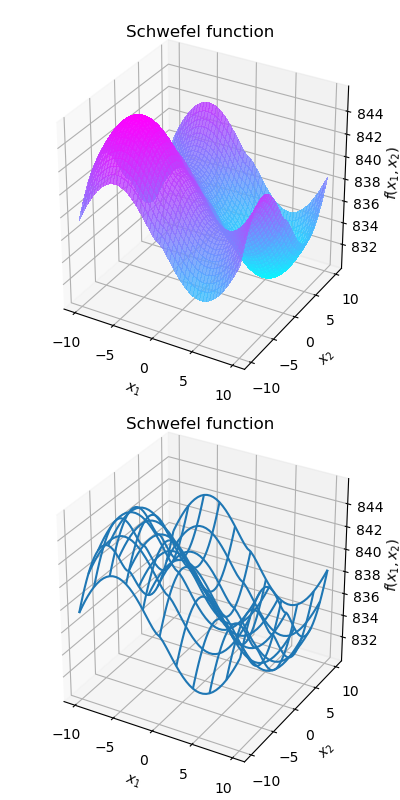

<IPython.core.display.Javascript object>


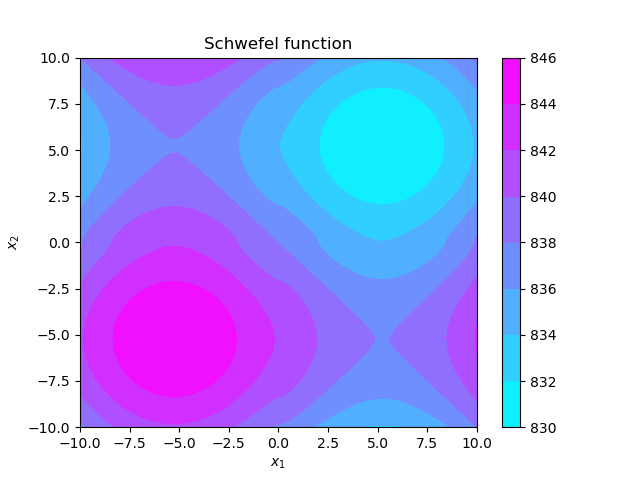

In [31]:
# Figure 1
fig1 = plt.figure(figsize=plt.figaspect(2.0))

# Subplot 1 (top) of Figure 1
ax1 = fig1.add_subplot(2, 1, 1, projection='3d')
# Surface plot:
surf = ax1.plot_surface(xx1, xx2, yy1,
                       cmap=set_cm, alpha=0.8,
                       linewidth=0, antialiased=False)
# Create axis labels and title:
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1,x_2)$')
ax1.set_title("%s function" % function_name)

# Subplot 2 (bottom) of Figure 1
ax2 = fig1.add_subplot(2, 1, 2, projection='3d')
# Plot a 3D wireframe (no colors)
ax2.plot_wireframe(xx1, xx2, yy1,
                   rstride=5, cstride=5)
# Create axis labels and title:
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$f(x_1,x_2)$')
ax2.set_title("%s function" % function_name)

plt.tight_layout()

#---------------------------------------------------------
# Figure 2
# Create Contour plot:
fig2 = plt.figure()
ax3 = fig2.add_subplot(1, 1, 1)
cset = ax3.contourf(xx1, xx2, yy1, cmap=set_cm)
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_title("%s function" % function_name)
fig2.colorbar(cset, ax=ax3)

Before we get on with the regression tasks, let's introduce a very common way to handle datasets in data science: the Pandas DataFrame.

* Let's create a pandas dataframe for the above dataset, i.e. for the inputs (features 'x1' and 'x2') and outputs (target 'y1').

In [32]:
import pandas as pd # Pandas dataframe (very common in ML)
#
# Create a dictionary with the names of the input and output variables
# and their respective values:
input_dictionary = {
            'x1' : input_points[:,0],
            'x2' : input_points[:,1],
            'y1' : output_points[:,0]
            }
#
# Then, we create a Pandas data frame:
df = pd.DataFrame(input_dictionary)

print(df)

             x1    x2          y1
0    -10.000000 -10.0  837.552129
1     -9.591837 -10.0  838.185887
2     -9.183673 -10.0  838.777493
3     -8.775510 -10.0  839.323512
4     -8.367347 -10.0  839.820614
...         ...   ...         ...
2495   8.367347  10.0  836.110986
2496   8.775510  10.0  836.608088
2497   9.183673  10.0  837.154107
2498   9.591837  10.0  837.745713
2499  10.000000  10.0  838.379471

[2500 rows x 3 columns]


Pandas DataFrame is a quite powerful way to handle data. For example:

* It deals with different kinds of data (not just numbers)


* It includes labels for each feature (input) and target (output). You can think about it like an organized way to create an 'Excel' table that we can easily access.

There is a lot more to it, of course...

Here, we will just highlight a few ways to handle a Pandas DataFrame:

1. Direct way to select columns & rows by how they were labeled originaly


2. DataFrame.loc to select columns & rows by Name


3. DataFrame.iloc to select columns & rows by Index Positions (integer numbers)

In [33]:
# Let's access every row of feature 'x1' and of target 'y1':

way1 = df[['x1','y1']] # direct way

way2 = df.loc[:,['x1','y1']] # using the labels of rows and columns

way3 = df.iloc[:,[0,2]] # using indices (integers) of rows and columns

print('way 1 =\n', way1, '\n\n') # the '\n' is to
                                 # make a new line for
                                 # visualization purposes only.
print('way 2 =\n', way2, '\n\n')
print('way 3 =\n', way3, '\n\n')

# Now let's access rows 2 until 5 (inclusive) of feature 'x2' and
# target 'y1':

# I think we can't do that by the direct way (correct me if I am wrong)

way2 = df.loc[2:5,['x2','y1']] # using the labels of data. Note that
                               # here when we write 2:5 (it includes)
                               # row with index 5

way3 = df.iloc[2:6,[1,2]] # using indices (integers) of the data
                          # note that we write 2:6 to include 5,
                          # which differs from way2 (!)
                          # Accessing 'x2' and 'y1' could also be
                          # done by writing 1:3 instead of [1,2]
# way3 = df.iloc[2:6,1:3] # alternative way to access 'x2' and 'y1'

print('Specific rows, way 2 =\n', way2, '\n\n')
print('Specific rows, way 3 =\n', way3, '\n\n')

way 1 =
              x1          y1
0    -10.000000  837.552129
1     -9.591837  838.185887
2     -9.183673  838.777493
3     -8.775510  839.323512
4     -8.367347  839.820614
...         ...         ...
2495   8.367347  836.110986
2496   8.775510  836.608088
2497   9.183673  837.154107
2498   9.591837  837.745713
2499  10.000000  838.379471

[2500 rows x 2 columns] 


way 2 =
              x1          y1
0    -10.000000  837.552129
1     -9.591837  838.185887
2     -9.183673  838.777493
3     -8.775510  839.323512
4     -8.367347  839.820614
...         ...         ...
2495   8.367347  836.110986
2496   8.775510  836.608088
2497   9.183673  837.154107
2498   9.591837  837.745713
2499  10.000000  838.379471

[2500 rows x 2 columns] 


way 3 =
              x1          y1
0    -10.000000  837.552129
1     -9.591837  838.185887
2     -9.183673  838.777493
3     -8.775510  839.323512
4     -8.367347  839.820614
...         ...         ...
2495   8.367347  836.110986
2496   8.775510  836.

Now let's load our data into numpy variables from our Pandas DataFrame.

In [34]:
X_data = df.loc[:,['x1','x2']].values # note that we ask for the
                                      # values, not a subset of the
                                      # DataFrame
y_data = df.loc[:,'y1'].values

print(X_data)
print(y_data)

[[-10.         -10.        ]
 [ -9.59183673 -10.        ]
 [ -9.18367347 -10.        ]
 ...
 [  9.18367347  10.        ]
 [  9.59183673  10.        ]
 [ 10.          10.        ]]
[837.55212937 838.18588668 838.77749275 ... 837.15410725 837.74571332
 838.37947063]


### Exercise 1
<a id='#split_dataset'></a>

As usual, split the dataset into training and testing sets.

* For now, let's split the data with the following ratio: 2% for training set, and 98% for testing set

Note: the commonly used ratio is 75% for training and 25% for testing, but we will use Gaussian Processes and they from very little data.

In [35]:
# Exercise 1

# Write here.
from sklearn.model_selection import train_test_split

testset_ratio = 0.98 # ratio of test set points from the dataset

X_train, X_test, y_train, y_test = train_test_split(X_data,
                                    y_data, test_size=testset_ratio,
                                    random_state=seed)
# until here.

As we saw in the previous class, it is good practice to scale the dataset (e.g. in Neural Networks this is very important).

So, let's do it:

In [36]:
from sklearn.preprocessing import StandardScaler

# Scaling inputs with a Standard Scaler:
scaler_x = StandardScaler().fit(X_train)
#
X_train_scaled=scaler_x.transform(X_train)
X_test_scaled=scaler_x.transform(X_test)
X_data_scaled=scaler_x.transform(X_data)

from sklearn.preprocessing import MinMaxScaler
# Scaling outputs with a MinMax Scaler (just to show a different one!):
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)
#
scaler_y = MinMaxScaler(feature_range=(-1,1)).fit(y_train)
#
y_train_scaled=scaler_y.transform(y_train)
y_test_scaled=scaler_y.transform(y_test)
y_data_scaled=scaler_y.transform(y_data)

## 1.1. Multidimensional regression with Gaussian Processes

### Exercise 2

Create a Gaussian Process Regression model for this training data and fit it to the entire dataset as well as to the test data.

* No need to create figures.

In [37]:
# Exercise 2

# Write here.
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared, ConstantKernel

# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the standard RBF kernel
#kernel = 1.0 * RBF(10, (1e-2, 1e2)) # Same kernel as above
                                    #(scikit-learn assumes constant
                                    # variance if you just write RBF
                                    # without the constant kernel or
                                    # without multiplying by 1.0)

# Other examples of kernels:
#kernel = ExpSineSquared(length_scale=3.0, periodicity=3.14,
#                       length_scale_bounds=(0.1, 10.0),
#                       periodicity_bounds=(0.1, 10)) * RBF(3.0, (1e-2, 1e2))
#kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)
                
gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-3, n_restarts_optimizer=20) # using a small alpha

# Fit to data using Maximum Likelihood Estimation of the parameters
gp_model.fit(X_train, y_train)

# Make the prediction on the entire dataset (for plotting)
y_data_pred, sigma_data_pred = gp_model.predict(X_data, return_std=True) # also output the uncertainty (standard deviation)

# Predict for test set (for error metric)
y_test_pred, sigma_test_pred = gp_model.predict(X_test, return_std=True) # also output the uncertainty (standard deviation)
#until here.

Now that you created the GPR model, let's create Surface plots to visualize the approximation when compared with the ground truth function.

<IPython.core.display.Javascript object>


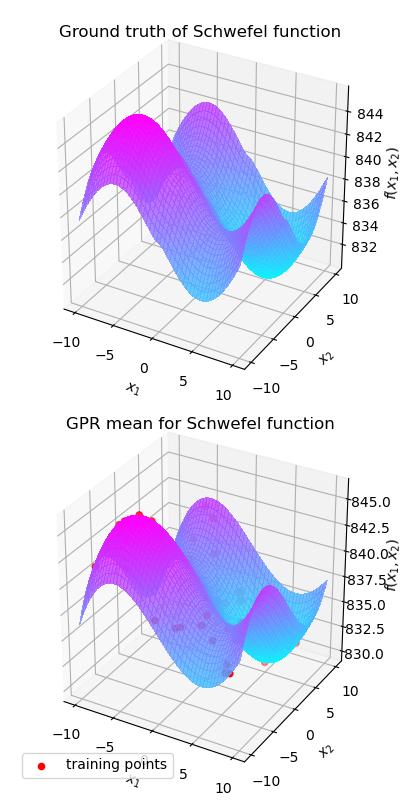

In [38]:
# Figure 1 is a Surface plot of the ground truth and
# the GPR approximation (2 subplots):
fig1 = plt.figure(figsize=plt.figaspect(2.0))
#
# Subplot 1 (top) of Figure 1: ground truth
ax1 = fig1.add_subplot(2, 1, 1, projection='3d')
#
# Don't forget that for a Surface plot we need the data
# coming out of meshgrid not in the format of X_data (!)
#
surf = ax1.plot_surface(xx1, xx2, yy1,
                       cmap=set_cm, alpha=0.8,
                       linewidth=0, antialiased=False)
#
# Create axis labels and title:
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1,x_2)$')
ax1.set_title("Ground truth of %s function" % function_name)

# Subplot 2 (bottom) of Figure 1
ax2 = fig1.add_subplot(2, 1, 2, projection='3d')
#
yy1_data_pred = np.reshape(y_data_pred,np.shape(xx1))

surf = ax2.plot_surface(xx1, xx2, yy1_data_pred,
                       cmap=set_cm, alpha=0.8,
                       linewidth=0, antialiased=False)
# Create axis labels and title:
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$f(x_1,x_2)$')
ax2.set_title("GPR mean for %s function" % function_name)
ax2.scatter(X_train[:,0], X_train[:,1], y_train,
            marker='o', color='red',
           label="training points")
ax2.legend(loc='lower left')

plt.tight_layout()

We can also plot this information via contour plots, and show not only the mean predicted by GPR but also the standard deviation.

Note: you can also overlay the 95% confidence intervals in a surface plot, but usually it becomes really cluttered (so we didn't do it).

<IPython.core.display.Javascript object>


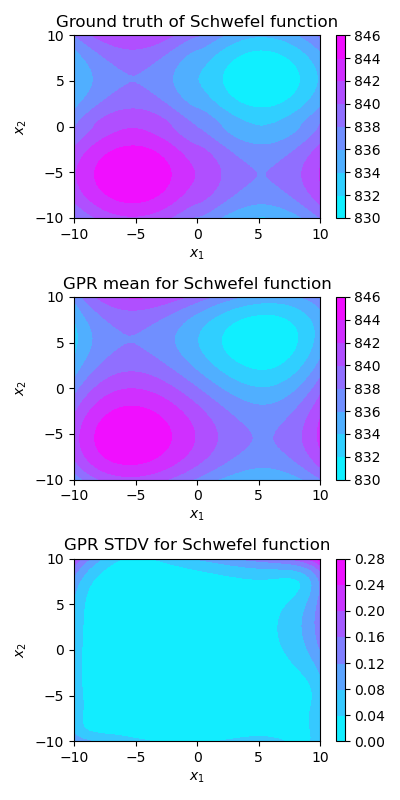

In [39]:
#---------------------------------------------------------
# Figure 2
fig2 = plt.figure(figsize=plt.figaspect(2.0))
# Create Contour plot:
ax3 = fig2.add_subplot(3, 1, 1)
cset = ax3.contourf(xx1, xx2, yy1, cmap=set_cm)
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_title("Ground truth of %s function" % function_name)
fig2.colorbar(cset, ax=ax3)

# Create Contour plot:
ax4 = fig2.add_subplot(3, 1, 2)
cset = ax4.contourf(xx1, xx2, yy1_data_pred, cmap=set_cm)
ax4.set_xlabel('$x_1$')
ax4.set_ylabel('$x_2$')
ax4.set_title("GPR mean for %s function" % function_name)
fig2.colorbar(cset, ax=ax4)

# Create Contour plot:
ax5 = fig2.add_subplot(3, 1, 3)

sigmasigma_data_pred = np.reshape(sigma_data_pred,np.shape(xx1))

cset = ax5.contourf(xx1, xx2, sigmasigma_data_pred, cmap=set_cm)
ax5.set_xlabel('$x_1$')
ax5.set_ylabel('$x_2$')
ax5.set_title("GPR STDV for %s function" % function_name)
fig2.colorbar(cset, ax=ax5)

plt.tight_layout()

I find it quite remarkable that GPR predicts this function almost perfectly while using only 50 points! This is equivalent to using just $\sqrt{50}\approx 7$ points per dimension!

### Exercise 3

Compute the $R^2$ error metric for the GPR approximation.

In [40]:
# Exercise 3

# Write here.
from sklearn.metrics import r2_score # Import error metrics

# Compute MSE and R2 for the GP model
gp_r2_value = r2_score(y_test, y_test_pred)

print('R2 score for GPR = ', gp_r2_value)
# until here.

R2 score for GPR =  0.9939732272290503


However, **Gaussian Processes are not perfect!**

* Try to redo the GPR approximation but now using 75% of the data for training (click [here](##split_dataset) to go to cell of Exercise 1)

* You will find that it will take a while to fit the GPR model (training dataset has 1875 points).

As we mentioned previously, Gaussian Processes are quite powerful but they are not very scalable.

## 1.2. Multidimensional regression with Artificial Neural Networks

As we discovered previously, ANNs behave in a somewhat opposite way: training for data scarce problems can be challenging, but ANNs are very scalable for "big data" problems.

In [41]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
#
# Function to create model, required for KerasClassifier when SPECIFYING INPUTS
def create_model(input_dimensions=1,neurons1=10,neurons2=10,neurons3=10,neurons4=10,activation='relu',optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation)) # first hidden layer
    model.add(Dense(neurons2, activation=activation)) # second hidden layer
    #model.add(Dense(neurons3, activation=activation)) # thrid hidden layer
    #model.add(Dense(neurons4, activation=activation)) # fourth hidden layer, etc.
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model
#
# Do you want to look for the best parameters for the Neural Network?
# (slower)
gridsearch = 0

if gridsearch==1:
    # create model
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0, patience=30, mode='min')
#    NN_model = KerasRegressor(build_fn=create_model(input_dimensions=1,neurons=20),
#                              callbacks=[early_stopping], validation_data=(scaler.transform(X_test), y_test))
    # define the grid search parameters
    neurons1 = [5,20,200] # number of neurons in hidden layer 1
    neurons2 = [5,10] # number of neurons in hidden layer 2 (if present; uncomment in create_model function)
    neurons3 = [10] # number of neurons in hidden layer 3 (if present; uncomment in create_model function)
    neurons4 = [10] # number of neurons in hidden layer 4 (if present; uncomment in create_model function)
    #
    batch_size = [len(X_train)]
    #
    epochs = [1000]
    #
    optimizer = ['adam']
#    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#    init_mode = ['uniform', 'lecun_uniform', 'normal', 'orthogonal', 'zero', 'one', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']    
    #
    param_grid = dict(batch_size=batch_size,
                      epochs=epochs,neurons1=neurons1,
                      neurons2=neurons2,
                      #neurons3=neurons3,neurons4=neurons4, # commented out because I am not using them
                      optimizer=optimizer)
    NN_model = KerasRegressor(build_fn=create_model,
                              input_dimensions=np.shape(X_train)[1])
    grid = GridSearchCV(estimator=NN_model,
                        param_grid=param_grid,
                        n_jobs=1, cv=3, iid=False)
    grid_result = grid.fit(X_train_scaled, y_train,
                           callbacks=[early_stopping],
                           validation_data=(X_test_scaled, y_test_scaled))
    history = grid_result.best_estimator_.fit(X_train_scaled,
                                              y_train,
                                              callbacks=[early_stopping],
                                              validation_data=(X_test_scaled,
                                                               y_test_scaled))
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_,
                                 grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
else: # just use a particular Neural Network of choice
    # Define early stopping:
    early_stopping = EarlyStopping(monitor='val_loss',
                                   min_delta=0.0,
                                   patience=30,
                                   mode='min')
    neurons1=200
    neurons2=5
    NN_model = KerasRegressor(build_fn=create_model,
                              input_dimensions=np.shape(X_train)[1],
                              neurons1=neurons1,
                              neurons2=neurons2,
                              batch_size=len(X_train),
                              epochs=1000,
                              optimizer='adam',
                              callbacks=[early_stopping],
                              validation_data=(X_test_scaled,
                                               y_test_scaled))
    #
    history = NN_model.fit(X_train_scaled, y_train_scaled)

Train on 50 samples, validate on 2450 samples
Epoch 1/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2888 - val_loss: 0.2552
Epoch 2/1000
50/50 [==============================] - 0s 628us/step - loss: 0.2675 - val_loss: 0.2384
Epoch 3/1000
50/50 [==============================] - 0s 663us/step - loss: 0.2492 - val_loss: 0.2245
Epoch 4/1000
50/50 [==============================] - 0s 754us/step - loss: 0.2348 - val_loss: 0.2140
Epoch 5/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.2234 - val_loss: 0.2059
Epoch 6/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.2149 - val_loss: 0.1997
Epoch 7/1000
50/50 [==============================] - 0s 792us/step - loss: 0.2080 - val_loss: 0.1947
Epoch 8/1000
50/50 [==============================] - 0s 825us/step - loss: 0.2026 - val_loss: 0.1906
Epoch 9/1000
50/50 [==============================] - 0s 973us/step - loss: 0.1978 - val_loss: 0.1871
Epoch 10/1000
50/50 [=====================

Epoch 81/1000
50/50 [==============================] - 0s 655us/step - loss: 0.0379 - val_loss: 0.0770
Epoch 82/1000
50/50 [==============================] - 0s 792us/step - loss: 0.0375 - val_loss: 0.0763
Epoch 83/1000
50/50 [==============================] - 0s 784us/step - loss: 0.0371 - val_loss: 0.0758
Epoch 84/1000
50/50 [==============================] - 0s 925us/step - loss: 0.0367 - val_loss: 0.0755
Epoch 85/1000
50/50 [==============================] - 0s 671us/step - loss: 0.0363 - val_loss: 0.0754
Epoch 86/1000
50/50 [==============================] - 0s 663us/step - loss: 0.0359 - val_loss: 0.0753
Epoch 87/1000
50/50 [==============================] - 0s 575us/step - loss: 0.0355 - val_loss: 0.0753
Epoch 88/1000
50/50 [==============================] - 0s 596us/step - loss: 0.0351 - val_loss: 0.0754
Epoch 89/1000
50/50 [==============================] - 0s 687us/step - loss: 0.0347 - val_loss: 0.0754
Epoch 90/1000
50/50 [==============================] - 0s 852us/step - lo

Epoch 160/1000
50/50 [==============================] - 0s 692us/step - loss: 0.0184 - val_loss: 0.0550
Epoch 161/1000
50/50 [==============================] - 0s 745us/step - loss: 0.0183 - val_loss: 0.0547
Epoch 162/1000
50/50 [==============================] - 0s 638us/step - loss: 0.0182 - val_loss: 0.0544
Epoch 163/1000
50/50 [==============================] - 0s 744us/step - loss: 0.0180 - val_loss: 0.0541
Epoch 164/1000
50/50 [==============================] - 0s 707us/step - loss: 0.0179 - val_loss: 0.0538
Epoch 165/1000
50/50 [==============================] - 0s 894us/step - loss: 0.0178 - val_loss: 0.0536
Epoch 166/1000
50/50 [==============================] - 0s 672us/step - loss: 0.0176 - val_loss: 0.0533
Epoch 167/1000
50/50 [==============================] - 0s 647us/step - loss: 0.0175 - val_loss: 0.0531
Epoch 168/1000
50/50 [==============================] - 0s 684us/step - loss: 0.0174 - val_loss: 0.0529
Epoch 169/1000
50/50 [==============================] - 0s 621us

Epoch 239/1000
50/50 [==============================] - 0s 770us/step - loss: 0.0096 - val_loss: 0.0357
Epoch 240/1000
50/50 [==============================] - 0s 686us/step - loss: 0.0095 - val_loss: 0.0355
Epoch 241/1000
50/50 [==============================] - 0s 765us/step - loss: 0.0094 - val_loss: 0.0353
Epoch 242/1000
50/50 [==============================] - 0s 775us/step - loss: 0.0094 - val_loss: 0.0351
Epoch 243/1000
50/50 [==============================] - 0s 971us/step - loss: 0.0093 - val_loss: 0.0349
Epoch 244/1000
50/50 [==============================] - 0s 728us/step - loss: 0.0092 - val_loss: 0.0347
Epoch 245/1000
50/50 [==============================] - 0s 748us/step - loss: 0.0091 - val_loss: 0.0345
Epoch 246/1000
50/50 [==============================] - 0s 781us/step - loss: 0.0090 - val_loss: 0.0343
Epoch 247/1000
50/50 [==============================] - 0s 704us/step - loss: 0.0089 - val_loss: 0.0341
Epoch 248/1000
50/50 [==============================] - 0s 596us

Epoch 318/1000
50/50 [==============================] - 0s 747us/step - loss: 0.0049 - val_loss: 0.0229
Epoch 319/1000
50/50 [==============================] - 0s 670us/step - loss: 0.0048 - val_loss: 0.0228
Epoch 320/1000
50/50 [==============================] - 0s 655us/step - loss: 0.0048 - val_loss: 0.0227
Epoch 321/1000
50/50 [==============================] - 0s 657us/step - loss: 0.0047 - val_loss: 0.0226
Epoch 322/1000
50/50 [==============================] - 0s 596us/step - loss: 0.0047 - val_loss: 0.0225
Epoch 323/1000
50/50 [==============================] - 0s 666us/step - loss: 0.0047 - val_loss: 0.0224
Epoch 324/1000
50/50 [==============================] - 0s 634us/step - loss: 0.0046 - val_loss: 0.0222
Epoch 325/1000
50/50 [==============================] - 0s 655us/step - loss: 0.0046 - val_loss: 0.0221
Epoch 326/1000
50/50 [==============================] - 0s 639us/step - loss: 0.0046 - val_loss: 0.0220
Epoch 327/1000
50/50 [==============================] - 0s 647us

Epoch 397/1000
50/50 [==============================] - 0s 670us/step - loss: 0.0026 - val_loss: 0.0160
Epoch 398/1000
50/50 [==============================] - 0s 664us/step - loss: 0.0026 - val_loss: 0.0159
Epoch 399/1000
50/50 [==============================] - 0s 636us/step - loss: 0.0026 - val_loss: 0.0158
Epoch 400/1000
50/50 [==============================] - 0s 656us/step - loss: 0.0026 - val_loss: 0.0158
Epoch 401/1000
50/50 [==============================] - 0s 721us/step - loss: 0.0026 - val_loss: 0.0157
Epoch 402/1000
50/50 [==============================] - 0s 672us/step - loss: 0.0025 - val_loss: 0.0157
Epoch 403/1000
50/50 [==============================] - 0s 635us/step - loss: 0.0025 - val_loss: 0.0156
Epoch 404/1000
50/50 [==============================] - 0s 817us/step - loss: 0.0025 - val_loss: 0.0155
Epoch 405/1000
50/50 [==============================] - 0s 683us/step - loss: 0.0025 - val_loss: 0.0155
Epoch 406/1000
50/50 [==============================] - 0s 690us

Epoch 476/1000
50/50 [==============================] - 0s 595us/step - loss: 0.0017 - val_loss: 0.0124
Epoch 477/1000
50/50 [==============================] - 0s 599us/step - loss: 0.0017 - val_loss: 0.0124
Epoch 478/1000
50/50 [==============================] - 0s 652us/step - loss: 0.0017 - val_loss: 0.0123
Epoch 479/1000
50/50 [==============================] - 0s 614us/step - loss: 0.0017 - val_loss: 0.0123
Epoch 480/1000
50/50 [==============================] - 0s 645us/step - loss: 0.0017 - val_loss: 0.0123
Epoch 481/1000
50/50 [==============================] - 0s 672us/step - loss: 0.0017 - val_loss: 0.0123
Epoch 482/1000
50/50 [==============================] - 0s 638us/step - loss: 0.0017 - val_loss: 0.0122
Epoch 483/1000
50/50 [==============================] - 0s 703us/step - loss: 0.0017 - val_loss: 0.0122
Epoch 484/1000
50/50 [==============================] - 0s 581us/step - loss: 0.0017 - val_loss: 0.0122
Epoch 485/1000
50/50 [==============================] - 0s 659us

Epoch 555/1000
50/50 [==============================] - 0s 685us/step - loss: 0.0013 - val_loss: 0.0102
Epoch 556/1000
50/50 [==============================] - 0s 632us/step - loss: 0.0013 - val_loss: 0.0102
Epoch 557/1000
50/50 [==============================] - 0s 671us/step - loss: 0.0013 - val_loss: 0.0102
Epoch 558/1000
50/50 [==============================] - 0s 658us/step - loss: 0.0013 - val_loss: 0.0102
Epoch 559/1000
50/50 [==============================] - 0s 639us/step - loss: 0.0013 - val_loss: 0.0102
Epoch 560/1000
50/50 [==============================] - 0s 725us/step - loss: 0.0013 - val_loss: 0.0101
Epoch 561/1000
50/50 [==============================] - 0s 649us/step - loss: 0.0013 - val_loss: 0.0101
Epoch 562/1000
50/50 [==============================] - 0s 709us/step - loss: 0.0013 - val_loss: 0.0101
Epoch 563/1000
50/50 [==============================] - 0s 750us/step - loss: 0.0013 - val_loss: 0.0101
Epoch 564/1000
50/50 [==============================] - 0s 632us

Epoch 634/1000
50/50 [==============================] - 0s 675us/step - loss: 9.8210e-04 - val_loss: 0.0088
Epoch 635/1000
50/50 [==============================] - 0s 693us/step - loss: 9.7901e-04 - val_loss: 0.0088
Epoch 636/1000
50/50 [==============================] - 0s 722us/step - loss: 9.7585e-04 - val_loss: 0.0088
Epoch 637/1000
50/50 [==============================] - 0s 623us/step - loss: 9.7262e-04 - val_loss: 0.0088
Epoch 638/1000
50/50 [==============================] - 0s 703us/step - loss: 9.6936e-04 - val_loss: 0.0087
Epoch 639/1000
50/50 [==============================] - 0s 714us/step - loss: 9.6592e-04 - val_loss: 0.0087
Epoch 640/1000
50/50 [==============================] - 0s 614us/step - loss: 9.6262e-04 - val_loss: 0.0087
Epoch 641/1000
50/50 [==============================] - 0s 598us/step - loss: 9.5947e-04 - val_loss: 0.0087
Epoch 642/1000
50/50 [==============================] - 0s 676us/step - loss: 9.5627e-04 - val_loss: 0.0087
Epoch 643/1000
50/50 [======

Epoch 710/1000
50/50 [==============================] - 0s 665us/step - loss: 7.5805e-04 - val_loss: 0.0079
Epoch 711/1000
50/50 [==============================] - 0s 648us/step - loss: 7.5532e-04 - val_loss: 0.0079
Epoch 712/1000
50/50 [==============================] - 0s 669us/step - loss: 7.5249e-04 - val_loss: 0.0079
Epoch 713/1000
50/50 [==============================] - 0s 663us/step - loss: 7.4973e-04 - val_loss: 0.0079
Epoch 714/1000
50/50 [==============================] - 0s 673us/step - loss: 7.4706e-04 - val_loss: 0.0078
Epoch 715/1000
50/50 [==============================] - 0s 661us/step - loss: 7.4432e-04 - val_loss: 0.0078
Epoch 716/1000
50/50 [==============================] - 0s 622us/step - loss: 7.4179e-04 - val_loss: 0.0078
Epoch 717/1000
50/50 [==============================] - 0s 636us/step - loss: 7.3890e-04 - val_loss: 0.0078
Epoch 718/1000
50/50 [==============================] - 0s 643us/step - loss: 7.3629e-04 - val_loss: 0.0078
Epoch 719/1000
50/50 [======

Epoch 786/1000
50/50 [==============================] - 0s 667us/step - loss: 5.8175e-04 - val_loss: 0.0072
Epoch 787/1000
50/50 [==============================] - 0s 617us/step - loss: 5.7980e-04 - val_loss: 0.0072
Epoch 788/1000
50/50 [==============================] - 0s 660us/step - loss: 5.7785e-04 - val_loss: 0.0072
Epoch 789/1000
50/50 [==============================] - 0s 622us/step - loss: 5.7608e-04 - val_loss: 0.0072
Epoch 790/1000
50/50 [==============================] - 0s 617us/step - loss: 5.7395e-04 - val_loss: 0.0072
Epoch 791/1000
50/50 [==============================] - 0s 648us/step - loss: 5.7204e-04 - val_loss: 0.0072
Epoch 792/1000
50/50 [==============================] - 0s 662us/step - loss: 5.7012e-04 - val_loss: 0.0072
Epoch 793/1000
50/50 [==============================] - 0s 629us/step - loss: 5.6823e-04 - val_loss: 0.0072
Epoch 794/1000
50/50 [==============================] - 0s 703us/step - loss: 5.6630e-04 - val_loss: 0.0072
Epoch 795/1000
50/50 [======

Epoch 862/1000
50/50 [==============================] - 0s 633us/step - loss: 4.5580e-04 - val_loss: 0.0067
Epoch 863/1000
50/50 [==============================] - 0s 699us/step - loss: 4.5432e-04 - val_loss: 0.0067
Epoch 864/1000
50/50 [==============================] - 0s 655us/step - loss: 4.5274e-04 - val_loss: 0.0067
Epoch 865/1000
50/50 [==============================] - 0s 620us/step - loss: 4.5123e-04 - val_loss: 0.0067
Epoch 866/1000
50/50 [==============================] - 0s 648us/step - loss: 4.4966e-04 - val_loss: 0.0067
Epoch 867/1000
50/50 [==============================] - 0s 668us/step - loss: 4.4803e-04 - val_loss: 0.0067
Epoch 868/1000
50/50 [==============================] - 0s 591us/step - loss: 4.4641e-04 - val_loss: 0.0067
Epoch 869/1000
50/50 [==============================] - 0s 641us/step - loss: 4.4483e-04 - val_loss: 0.0067
Epoch 870/1000
50/50 [==============================] - 0s 642us/step - loss: 4.4321e-04 - val_loss: 0.0067
Epoch 871/1000
50/50 [======

Epoch 938/1000
50/50 [==============================] - 0s 636us/step - loss: 3.4389e-04 - val_loss: 0.0062
Epoch 939/1000
50/50 [==============================] - 0s 642us/step - loss: 3.4257e-04 - val_loss: 0.0062
Epoch 940/1000
50/50 [==============================] - 0s 637us/step - loss: 3.4148e-04 - val_loss: 0.0062
Epoch 941/1000
50/50 [==============================] - 0s 664us/step - loss: 3.4000e-04 - val_loss: 0.0062
Epoch 942/1000
50/50 [==============================] - 0s 667us/step - loss: 3.3876e-04 - val_loss: 0.0062
Epoch 943/1000
50/50 [==============================] - 0s 656us/step - loss: 3.3745e-04 - val_loss: 0.0062
Epoch 944/1000
50/50 [==============================] - 0s 617us/step - loss: 3.3620e-04 - val_loss: 0.0062
Epoch 945/1000
50/50 [==============================] - 0s 644us/step - loss: 3.3504e-04 - val_loss: 0.0062
Epoch 946/1000
50/50 [==============================] - 0s 628us/step - loss: 3.3380e-04 - val_loss: 0.0062
Epoch 947/1000
50/50 [======

Let's make the same plots as we made for ANN

<IPython.core.display.Javascript object>


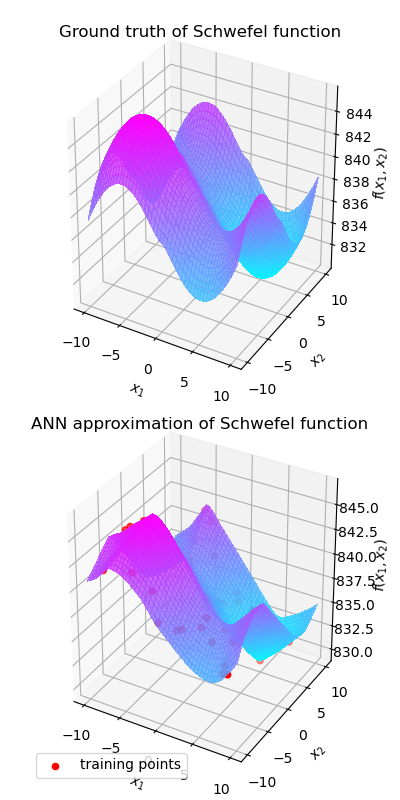

In [42]:
# Figure 1 is a Surface plot of the ground truth and
# the ANN approximation (2 subplots):
fig1 = plt.figure(figsize=plt.figaspect(2.0))
#
# Subplot 1 (top) of Figure 1: ground truth
ax1 = fig1.add_subplot(2, 1, 1, projection='3d')
#
# Don't forget that for a Surface plot we need the data
# coming out of meshgrid not in the format of X_data (!)
#
surf = ax1.plot_surface(xx1, xx2, yy1,
                       cmap=set_cm, alpha=0.8,
                       linewidth=0, antialiased=False)
#
# Create axis labels and title:
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1,x_2)$')
ax1.set_title("Ground truth of %s function" % function_name)

# Subplot 2 (bottom) of Figure 1
ax2 = fig1.add_subplot(2, 1, 2, projection='3d')
#
y_data_pred_scaled = history.model.predict(X_data_scaled)
yy1_data_pred = np.reshape(scaler_y.inverse_transform(y_data_pred_scaled),
                           np.shape(xx1)) # note the transformation
                                          # of the outputs back to
                                          # the original scale

surf = ax2.plot_surface(xx1, xx2, yy1_data_pred,
                       cmap=set_cm, alpha=0.8,
                       linewidth=0, antialiased=False)
# Create axis labels and title:
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$f(x_1,x_2)$')
ax2.set_title("ANN approximation of %s function" % function_name)
ax2.scatter(X_train[:,0], X_train[:,1], y_train,
            marker='o', color='red',
           label="training points")
ax2.legend(loc='lower left')

plt.tight_layout()

The approximation is not bad when we know a bit about what we are doing ;)

* However, it can be challenging to make ANNs as good as GPR for a small number of training points.

In [43]:
# Compute R2 for the ANN model

y_test_pred = history.model.predict(X_test_scaled)

ANN_r2_value = r2_score(y_test, scaler_y.inverse_transform(y_test_pred))
# note the transformation of the outputs back to the original scale

print('R2 score for ANN = ', ANN_r2_value)

R2 score for ANN =  0.9768830703624927


Try training GPR and ANN using different split ratio for training and testing data!

* Click [here](##split_dataset) to go to the cell of Exercise 1.

## 1.3. GPR and ANN with noisy datasets

Due to time constraints, I won't do with you the same cases when considering a noisy dataset...

But I am including the codes here and we can take a look at the results.

In [16]:
# Create the noisy dataset:
random_std = 0.05+0.1*np.random.random(y_data.shape)
max_diff = np.max(y_data)-np.min(y_data) # magnitude of signal
noise_data = np.random.normal(0,random_std)*max_diff
y_noisy_data = y_data + noise_data # Perturb every y_data point with Gaussian noise

# Pair up points with their associated noise level (because of train_test_split):
Y_noisy_data = np.column_stack((y_noisy_data,noise_data))

# Split into 10% training points and the rest for testing:
X_train, X_test, Y_noisy_train, Y_noisy_test = train_test_split(X_data,
                                    Y_noisy_data, test_size=testset_ratio,
                                    random_state=seed) # "noisy_train" is a great name for a variable, hein?

y_noisy_train = Y_noisy_train[:,0]
noise_train = Y_noisy_train[:,1]
y_noisy_test = Y_noisy_test[:,0]
noise_test = Y_noisy_test[:,1]

# Scaling inputs with a Standard Scaler:
scaler_x = StandardScaler().fit(X_train)
#
X_train_scaled=scaler_x.transform(X_train)
X_test_scaled=scaler_x.transform(X_test)
X_data_scaled=scaler_x.transform(X_data)

# Scaling outputs with a Standard Scaler:
y_noisy_train = y_noisy_train.reshape(-1, 1)
y_noisy_test = y_noisy_test.reshape(-1, 1)
y_noisy_data = y_noisy_data.reshape(-1, 1)
#
scaler_y = MinMaxScaler().fit(y_noisy_train)
#
y_noisy_train_scaled=scaler_y.transform(y_noisy_train)
y_noisy_test_scaled=scaler_y.transform(y_noisy_test)
y_noisy_data_scaled=scaler_y.transform(y_noisy_data)

<IPython.core.display.Javascript object>


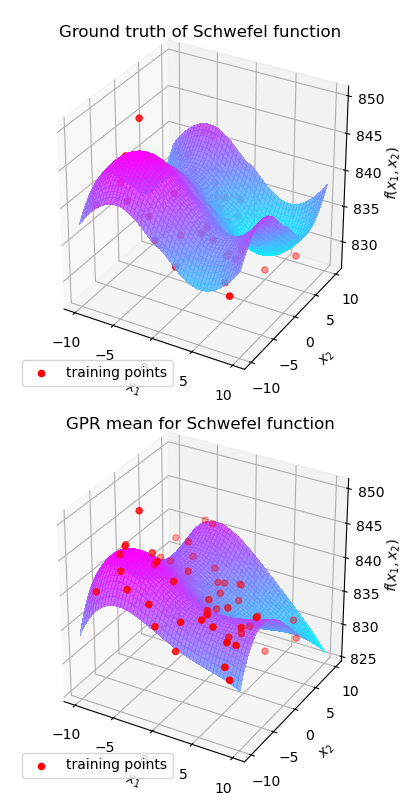

<IPython.core.display.Javascript object>


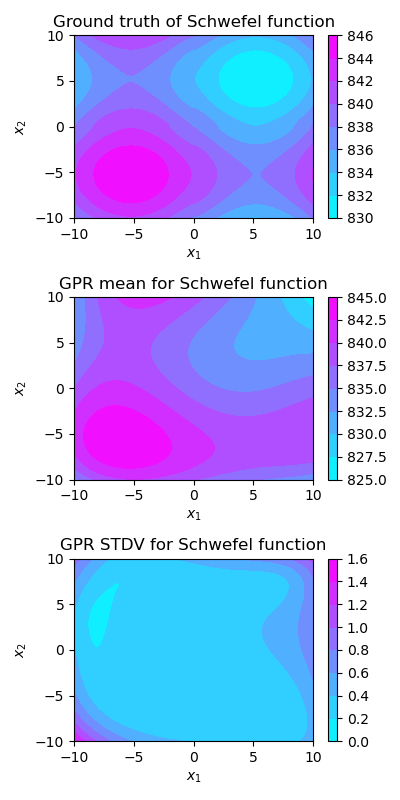

R2 score for GPR =  0.712923541556058


In [17]:
# GRP
# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the standard RBF kernel
#kernel = 1.0 * RBF(10, (1e-2, 1e2)) # Same kernel as above
                                    #(scikit-learn assumes constant
                                    # variance if you just write RBF
                                    # without the constant kernel or
                                    # without multiplying by 1.0)

# Other examples of kernels:
#kernel = ExpSineSquared(length_scale=3.0, periodicity=3.14,
#                       length_scale_bounds=(0.1, 10.0),
#                       periodicity_bounds=(0.1, 10)) * RBF(3.0, (1e-2, 1e2))
#kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)
                
gp_model = GaussianProcessRegressor(kernel=kernel,
                                    alpha=noise_train.ravel()**2,
                                    n_restarts_optimizer=20) # using a small alpha

# Fit to data using Maximum Likelihood Estimation of the parameters
gp_model.fit(X_train, y_noisy_train)

# Make the prediction on the entire dataset (for plotting)
y_noisy_data_pred, sigma_noisy_data_pred = gp_model.predict(X_data,
                                                            return_std=True) # also output the uncertainty (standard deviation)

# Predict for test set (for error metric)
y_noisy_test_pred, sigma_noisy_test_pred = gp_model.predict(X_test,
                                                            return_std=True) # also output the uncertainty (standard deviation)

# PLOTS
# Figure 1
# Subplot 1
fig1 = plt.figure(figsize=plt.figaspect(2.0))
ax1 = fig1.add_subplot(2, 1, 1, projection='3d')
surf = ax1.plot_surface(xx1, xx2, yy1,
                       cmap=set_cm, alpha=0.8,
                       linewidth=0, antialiased=False)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1,x_2)$')
ax1.set_title("Ground truth of %s function" % function_name)
ax1.scatter(X_train[:,0], X_train[:,1], y_noisy_train,
            marker='o', color='red',
           label="training points")
ax1.legend(loc='lower left')

# Subplot 2
ax2 = fig1.add_subplot(2, 1, 2, projection='3d')
yy1_noisy_data_pred = np.reshape(y_noisy_data_pred,np.shape(xx1))
surf = ax2.plot_surface(xx1, xx2,
                        yy1_noisy_data_pred,
                        cmap=set_cm, alpha=0.8,
                        linewidth=0, antialiased=False)
# Create axis labels and title:
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$f(x_1,x_2)$')
ax2.set_title("GPR mean for %s function" % function_name)
ax2.scatter(X_train[:,0], X_train[:,1], y_noisy_train,
            marker='o', color='red',
           label="training points")
ax2.legend(loc='lower left')

plt.tight_layout()


#---------------------------------------------------------
# Figure 2
fig2 = plt.figure(figsize=plt.figaspect(2.0))
# Create Contour plot:
ax3 = fig2.add_subplot(3, 1, 1)
cset = ax3.contourf(xx1, xx2, yy1, cmap=set_cm)
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_title("Ground truth of %s function" % function_name)
fig2.colorbar(cset, ax=ax3)

# Create Contour plot:
ax4 = fig2.add_subplot(3, 1, 2)
cset = ax4.contourf(xx1, xx2,
                    yy1_noisy_data_pred,
                    cmap=set_cm)
ax4.set_xlabel('$x_1$')
ax4.set_ylabel('$x_2$')
ax4.set_title("GPR mean for %s function" % function_name)
fig2.colorbar(cset, ax=ax4)

# Create Contour plot:
ax5 = fig2.add_subplot(3, 1, 3)
sigmasigma_noisy_data_pred = np.reshape(sigma_noisy_data_pred,
                                        np.shape(xx1))
cset = ax5.contourf(xx1, xx2,
                    sigmasigma_noisy_data_pred,
                    cmap=set_cm)
ax5.set_xlabel('$x_1$')
ax5.set_ylabel('$x_2$')
ax5.set_title("GPR STDV for %s function" % function_name)
fig2.colorbar(cset, ax=ax5)

plt.tight_layout()

# Error metric
# Compute R2 for the GP model
gp_r2_value = r2_score(y_noisy_test, y_noisy_test_pred)

print('R2 score for GPR = ', gp_r2_value)

Train on 50 samples, validate on 2450 samples
Epoch 1/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.2374 - val_loss: 0.2047
Epoch 2/1000
50/50 [==============================] - 0s 782us/step - loss: 0.2007 - val_loss: 0.1692
Epoch 3/1000
50/50 [==============================] - 0s 662us/step - loss: 0.1634 - val_loss: 0.1375
Epoch 4/1000
50/50 [==============================] - 0s 837us/step - loss: 0.1299 - val_loss: 0.1087
Epoch 5/1000
50/50 [==============================] - 0s 630us/step - loss: 0.0997 - val_loss: 0.0871
Epoch 6/1000
50/50 [==============================] - 0s 715us/step - loss: 0.0770 - val_loss: 0.0710
Epoch 7/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.0605 - val_loss: 0.0604
Epoch 8/1000
50/50 [==============================] - 0s 818us/step - loss: 0.0500 - val_loss: 0.0535
Epoch 9/1000
50/50 [==============================] - 0s 723us/step - loss: 0.0436 - val_loss: 0.0492
Epoch 10/1000
50/50 [===================

Epoch 81/1000
50/50 [==============================] - 0s 791us/step - loss: 0.0130 - val_loss: 0.0242
Epoch 82/1000
50/50 [==============================] - 0s 715us/step - loss: 0.0129 - val_loss: 0.0241
Epoch 83/1000
50/50 [==============================] - 0s 823us/step - loss: 0.0128 - val_loss: 0.0239
Epoch 84/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0127 - val_loss: 0.0238
Epoch 85/1000
50/50 [==============================] - 0s 644us/step - loss: 0.0126 - val_loss: 0.0236
Epoch 86/1000
50/50 [==============================] - 0s 884us/step - loss: 0.0125 - val_loss: 0.0234
Epoch 87/1000
50/50 [==============================] - 0s 719us/step - loss: 0.0124 - val_loss: 0.0233
Epoch 88/1000
50/50 [==============================] - 0s 877us/step - loss: 0.0123 - val_loss: 0.0231
Epoch 89/1000
50/50 [==============================] - 0s 711us/step - loss: 0.0122 - val_loss: 0.0230
Epoch 90/1000
50/50 [==============================] - 0s 694us/step - lo

Epoch 160/1000
50/50 [==============================] - 0s 678us/step - loss: 0.0082 - val_loss: 0.0174
Epoch 161/1000
50/50 [==============================] - 0s 606us/step - loss: 0.0081 - val_loss: 0.0174
Epoch 162/1000
50/50 [==============================] - 0s 598us/step - loss: 0.0081 - val_loss: 0.0173
Epoch 163/1000
50/50 [==============================] - 0s 701us/step - loss: 0.0081 - val_loss: 0.0173
Epoch 164/1000
50/50 [==============================] - 0s 819us/step - loss: 0.0080 - val_loss: 0.0172
Epoch 165/1000
50/50 [==============================] - 0s 754us/step - loss: 0.0080 - val_loss: 0.0172
Epoch 166/1000
50/50 [==============================] - 0s 686us/step - loss: 0.0080 - val_loss: 0.0171
Epoch 167/1000
50/50 [==============================] - 0s 676us/step - loss: 0.0079 - val_loss: 0.0171
Epoch 168/1000
50/50 [==============================] - 0s 683us/step - loss: 0.0079 - val_loss: 0.0170
Epoch 169/1000
50/50 [==============================] - 0s 712us

Epoch 239/1000
50/50 [==============================] - 0s 928us/step - loss: 0.0058 - val_loss: 0.0141
Epoch 240/1000
50/50 [==============================] - 0s 816us/step - loss: 0.0058 - val_loss: 0.0141
Epoch 241/1000
50/50 [==============================] - 0s 932us/step - loss: 0.0058 - val_loss: 0.0141
Epoch 242/1000
50/50 [==============================] - 0s 751us/step - loss: 0.0058 - val_loss: 0.0140
Epoch 243/1000
50/50 [==============================] - 0s 631us/step - loss: 0.0057 - val_loss: 0.0140
Epoch 244/1000
50/50 [==============================] - 0s 547us/step - loss: 0.0057 - val_loss: 0.0140
Epoch 245/1000
50/50 [==============================] - 0s 639us/step - loss: 0.0057 - val_loss: 0.0140
Epoch 246/1000
50/50 [==============================] - 0s 776us/step - loss: 0.0057 - val_loss: 0.0139
Epoch 247/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0139
Epoch 248/1000
50/50 [==============================] - 0s 740us/s

Epoch 318/1000
50/50 [==============================] - 0s 863us/step - loss: 0.0044 - val_loss: 0.0119
Epoch 319/1000
50/50 [==============================] - 0s 927us/step - loss: 0.0044 - val_loss: 0.0118
Epoch 320/1000
50/50 [==============================] - 0s 716us/step - loss: 0.0044 - val_loss: 0.0118
Epoch 321/1000
50/50 [==============================] - 0s 681us/step - loss: 0.0044 - val_loss: 0.0118
Epoch 322/1000
50/50 [==============================] - 0s 656us/step - loss: 0.0044 - val_loss: 0.0118
Epoch 323/1000
50/50 [==============================] - 0s 798us/step - loss: 0.0044 - val_loss: 0.0118
Epoch 324/1000
50/50 [==============================] - 0s 717us/step - loss: 0.0044 - val_loss: 0.0117
Epoch 325/1000
50/50 [==============================] - 0s 882us/step - loss: 0.0044 - val_loss: 0.0117
Epoch 326/1000
50/50 [==============================] - 0s 796us/step - loss: 0.0044 - val_loss: 0.0117
Epoch 327/1000
50/50 [==============================] - 0s 617us

Epoch 397/1000
50/50 [==============================] - 0s 828us/step - loss: 0.0038 - val_loss: 0.0108
Epoch 398/1000
50/50 [==============================] - 0s 647us/step - loss: 0.0038 - val_loss: 0.0108
Epoch 399/1000
50/50 [==============================] - 0s 791us/step - loss: 0.0037 - val_loss: 0.0108
Epoch 400/1000
50/50 [==============================] - 0s 705us/step - loss: 0.0037 - val_loss: 0.0108
Epoch 401/1000
50/50 [==============================] - 0s 822us/step - loss: 0.0037 - val_loss: 0.0108
Epoch 402/1000
50/50 [==============================] - 0s 679us/step - loss: 0.0037 - val_loss: 0.0107
Epoch 403/1000
50/50 [==============================] - 0s 621us/step - loss: 0.0037 - val_loss: 0.0107
Epoch 404/1000
50/50 [==============================] - 0s 625us/step - loss: 0.0037 - val_loss: 0.0107
Epoch 405/1000
50/50 [==============================] - 0s 705us/step - loss: 0.0037 - val_loss: 0.0107
Epoch 406/1000
50/50 [==============================] - 0s 975us

Epoch 476/1000
50/50 [==============================] - 0s 824us/step - loss: 0.0034 - val_loss: 0.0102
Epoch 477/1000
50/50 [==============================] - 0s 930us/step - loss: 0.0033 - val_loss: 0.0102
Epoch 478/1000
50/50 [==============================] - 0s 747us/step - loss: 0.0033 - val_loss: 0.0102
Epoch 479/1000
50/50 [==============================] - 0s 678us/step - loss: 0.0033 - val_loss: 0.0102
Epoch 480/1000
50/50 [==============================] - 0s 567us/step - loss: 0.0033 - val_loss: 0.0102
Epoch 481/1000
50/50 [==============================] - 0s 724us/step - loss: 0.0033 - val_loss: 0.0102
Epoch 482/1000
50/50 [==============================] - 0s 738us/step - loss: 0.0033 - val_loss: 0.0102
Epoch 483/1000
50/50 [==============================] - 0s 889us/step - loss: 0.0033 - val_loss: 0.0102
Epoch 484/1000
50/50 [==============================] - 0s 767us/step - loss: 0.0033 - val_loss: 0.0102
Epoch 485/1000
50/50 [==============================] - 0s 781us

Epoch 555/1000
50/50 [==============================] - 0s 920us/step - loss: 0.0030 - val_loss: 0.0097
Epoch 556/1000
50/50 [==============================] - 0s 714us/step - loss: 0.0030 - val_loss: 0.0097
Epoch 557/1000
50/50 [==============================] - 0s 683us/step - loss: 0.0030 - val_loss: 0.0097
Epoch 558/1000
50/50 [==============================] - 0s 591us/step - loss: 0.0030 - val_loss: 0.0097
Epoch 559/1000
50/50 [==============================] - 0s 701us/step - loss: 0.0030 - val_loss: 0.0098
Epoch 560/1000
50/50 [==============================] - 0s 713us/step - loss: 0.0030 - val_loss: 0.0098
Epoch 561/1000
50/50 [==============================] - 0s 876us/step - loss: 0.0030 - val_loss: 0.0098
Epoch 562/1000
50/50 [==============================] - 0s 805us/step - loss: 0.0030 - val_loss: 0.0098
Epoch 563/1000
50/50 [==============================] - 0s 710us/step - loss: 0.0030 - val_loss: 0.0098
Epoch 564/1000
50/50 [==============================] - 0s 644us

<IPython.core.display.Javascript object>


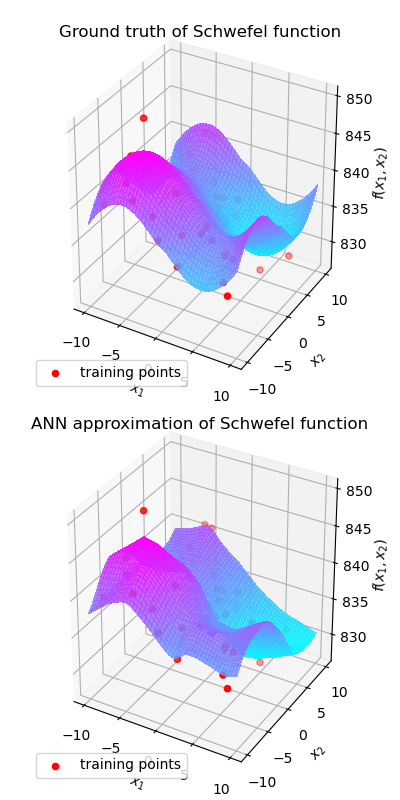

R2 score for ANN =  0.7366601546386107


In [18]:
# And now for the ANN:

# Function to create model, required for KerasClassifier when SPECIFYING INPUTS
def create_model(input_dimensions=1,neurons1=10,neurons2=10,neurons3=10,neurons4=10,activation='relu',optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation)) # first hidden layer
    model.add(Dense(neurons2, activation=activation)) # second hidden layer
    #model.add(Dense(neurons3, activation=activation)) # thrid hidden layer
    #model.add(Dense(neurons4, activation=activation)) # fourth hidden layer, etc.
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model
#
# Do you want to look for the best parameters for the Neural Network?
# (slower)
gridsearch = 0

if gridsearch==1:
    # create model
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0, patience=30, mode='min')
#    NN_model = KerasRegressor(build_fn=create_model(input_dimensions=1,neurons=20),
#                              callbacks=[early_stopping], validation_data=(scaler.transform(X_test), y_test))
    # define the grid search parameters
    neurons1 = [5,20,200] # number of neurons in hidden layer 1
    neurons2 = [5,10] # number of neurons in hidden layer 2 (if present; uncomment in create_model function)
    neurons3 = [10] # number of neurons in hidden layer 3 (if present; uncomment in create_model function)
    neurons4 = [10] # number of neurons in hidden layer 4 (if present; uncomment in create_model function)
    #
    batch_size = [len(X_train)]
    #
    epochs = [1000]
    #
    optimizer = ['adam']
#    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#    init_mode = ['uniform', 'lecun_uniform', 'normal', 'orthogonal', 'zero', 'one', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']    
    #
    param_grid = dict(batch_size=batch_size,
                      epochs=epochs,neurons1=neurons1,
                      neurons2=neurons2,
                      #neurons3=neurons3,neurons4=neurons4, # commented out because I am not using them
                      optimizer=optimizer)
    NN_model = KerasRegressor(build_fn=create_model,
                              input_dimensions=np.shape(X_train)[1])
    grid = GridSearchCV(estimator=NN_model,
                        param_grid=param_grid,
                        n_jobs=1, cv=3, iid=False)
    grid_result = grid.fit(X_train_scaled, y_train,
                           callbacks=[early_stopping],
                           validation_data=(X_test_scaled, y_noisy_test_scaled))
    history = grid_result.best_estimator_.fit(X_train_scaled,
                                              y_train,
                                              callbacks=[early_stopping],
                                              validation_data=(X_test_scaled,
                                                               y_noisy_test_scaled))
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_,
                                 grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
else: # just use a particular Neural Network of choice
    # Define early stopping:
    early_stopping = EarlyStopping(monitor='val_loss',
                                   min_delta=0.0,
                                   patience=30,
                                   mode='min')
    neurons1=200
    neurons2=10
    NN_model = KerasRegressor(build_fn=create_model,
                              input_dimensions=np.shape(X_train)[1],
                              neurons1=neurons1,
                              neurons2=neurons2,
                              batch_size=len(X_train),
                              epochs=1000,
                              optimizer='adam',
                              callbacks=[early_stopping],
                              validation_data=(X_test_scaled,
                                               y_noisy_test_scaled))
    #
    history = NN_model.fit(X_train_scaled, y_noisy_train_scaled)
#    
#   
# PLOTS
# Figure 1 is a Surface plot of the ground truth and
# the ANN approximation (2 subplots):
fig1 = plt.figure(figsize=plt.figaspect(2.0))
#
# Subplot 1 (top) of Figure 1: ground truth
ax1 = fig1.add_subplot(2, 1, 1, projection='3d')
#
# Don't forget that for a Surface plot we need the data
# coming out of meshgrid not in the format of X_data (!)
#
surf = ax1.plot_surface(xx1, xx2, yy1,
                       cmap=set_cm, alpha=0.8,
                       linewidth=0, antialiased=False)
#
# Create axis labels and title:
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$f(x_1,x_2)$')
ax1.set_title("Ground truth of %s function" % function_name)
ax1.scatter(X_train[:,0], X_train[:,1], y_noisy_train,
            marker='o', color='red',
            label="training points")
ax1.legend(loc='lower left')

# Subplot 2 (bottom) of Figure 1
ax2 = fig1.add_subplot(2, 1, 2, projection='3d')
#
y_noisy_data_pred = history.model.predict(X_data_scaled)
yy1_noisy_data_pred = np.reshape(scaler_y.inverse_transform(y_noisy_data_pred),
                           np.shape(xx1)) # note the transformation
                                          # of the outputs back to
                                          # the original scale

surf = ax2.plot_surface(xx1, xx2, yy1_noisy_data_pred,
                       cmap=set_cm, alpha=0.8,
                       linewidth=0, antialiased=False)
# Create axis labels and title:
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$f(x_1,x_2)$')
ax2.set_title("ANN approximation of %s function" % function_name)
ax2.scatter(X_train[:,0], X_train[:,1], y_noisy_train,
            marker='o', color='red',
           label="training points")
ax2.legend(loc='lower left')

plt.tight_layout()


# Compute R2 for the ANN model
y_noisy_test_pred = history.model.predict(X_test_scaled)
ANN_r2_value = r2_score(y_noisy_test, scaler_y.inverse_transform(y_noisy_test_pred))
# note the transformation of the outputs back to the original scale

print('R2 score for ANN = ', ANN_r2_value)

## Don't forget to "play" with this notebook

* **Try learning different functions!**: go to the beginning of the notebook and change the benchmark function to be learned (e.g. Levy function)


* Use different noise levels


* Try different kernels for the GPR


* Do a gridsearch to find better parameters for the ANN


* Investigate the role of "early stopping" in the ANN


There are so many things that we can do to go deeper in the topic! Have some fun with it!

**Important Note:** Despite this notebook being dedicated to 3D surfaces (2 features and 1 target), the algorithms are general. They can perform regression for any dimensionality of features and targets. The codes do not change significantly, but visualizing data can be a challenge. The simplest solution is to project the space back to a 3D space. You will do that in the Final Project...

# 2. Multidimensional classification

Here's some good news:

* If you understood most of what we discussed for regression with supervised learning... Then, performing classification with supervised learning is very similar from a user standpoint.

But first: what is classification?

* Classification problems occur when the target (output) is **discrete**, instead of being a continuous variable like we did in regression problems.

* A simple classification problem that is very common to consider when first learning about this topic is the Iris dataset created by UCI researchers in 1936: http://archive.ics.uci.edu/ml/datasets/Iris

* I downloaded the .CSV file from Kaggle and it is included in the docs folder of this GitHub repository.

Therefore, we can load that .CVS file into a Pandas DataFrame

In [24]:
# Load the Iris dataset.

iris_data = pd.read_csv('docs/Iris.csv')

print(iris_data)

# A short note: in fact, the Iris dataset is SO common, that
# Scikit-learn even has it saved and it can be loaded directly
# from the scikit-learn code:

from sklearn.datasets import load_iris

iris = load_iris() # load Iris dataset that already exists in Scikit-learn
# Convert it to a Pandas Dataframe
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# You can print(data1) and see that it is the same dataset.

# But I think it is informative to understand the usual process
# in machine learning: someone gives us a dataset (or we download
# it from somewhere) and we usually load it with Pandas due to its
# versatility.

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

When you start a new problem, the first step is:

* Get to know the dataset.

What are the features? And the targets? What kind of data preprocessing should we do? What do we know *before* using machine learning tools on the dataset?



Here's a nice figure to understand the dataset (source: https://www.ritchieng.com/machine-learning-iris-dataset/)



<div>
<img src=docs/iris_dataset_explanation.png width=300px></div>

The dataset is quite simple! It has:

* 4 Features (inputs): sepal length, sepal width, petal length, petal width


* 1 Target (output): iris species (3 different species with 50 samples each)

In other words, the dataset has 150 samples of 3 different species of iris (50 samples per species) and each flower has 4 features that characterize it: the length and width of the petal and the sepal (see figure above).

**Our task**: Learn from part of the dataset how to classify a new iris flower into one of the 3 species!

Note: This example is straight out of Scikit-learn (but simplified)

In [25]:
from sklearn import svm

# Let's only use the first two features (ignoring the other 2).
X = iris_data.loc[:, ['SepalLengthCm','SepalWidthCm'] ].values
y_string = iris_data.loc[:, 'Species'].values

print('y_string = ',y_string,'\n\n')

# Importantly, we should convert our target (output) data from
# string to integers! In this case we have three discrete target
# values, so we should convert to 0, 1 and 2

# Pandas makes this very easy for us. Just one line!

y = pd.Categorical(pd.factorize(y_string)[0])

print('y = ',y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

<IPython.core.display.Javascript object>


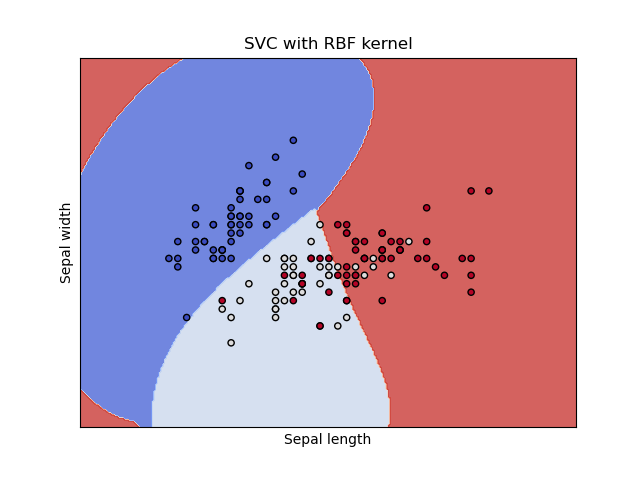

In [26]:
# we create an instance of SVM and fit out data. We do not scale our
# data (this dataset is quite simple)
C = 1.0  # SVM regularization parameter
svm_model = svm.SVC(kernel='rbf', gamma=0.7, C=C)

svm_model.fit(X, y)

# Set-up 2x2 grid for plotting.
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X1, X2 = X[:, 0], X[:, 1]

X1_min, X1_max = X1.min() - 1, X1.max() + 1 # define min and max of feature 0
X2_min, X2_max = X2.min() - 1, X2.max() + 1 # define min and max of feature 0
xx1, xx2 = np.meshgrid(np.arange(X1_min, X1_max, 0.02),
                       np.arange(X2_min, X2_max, 0.02))

Y = svm_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Y = Y.reshape(xx1.shape)

ax.contourf(xx1, xx2, Y, cmap=cm.coolwarm, alpha=0.8)

#plot_contours(ax, svm_model, xx1, xx2,
#              cmap=cm.coolwarm, alpha=0.8)
ax.scatter(X1, X2, c=y, cmap=cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with RBF kernel')

plt.show()

* Let's now plot for all 4 features, instead of considering only the first 2.

* Let's also use a different classifier. Instead of Support Vector Machines (SVM), we will use Decision Trees.

The following is also an example from Scikit-learn.

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Load all the features and the target variables:
X = iris_data.iloc[:, 1:5 ].values
feature_names = iris_data.columns.values[1:5] # not including the "ID" column

y_strings = iris_data.loc[:, 'Species'].values
target_names = iris_data.loc[:, 'Species'].unique()

print(feature_names)
print(target_names)

['SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm']
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


<IPython.core.display.Javascript object>


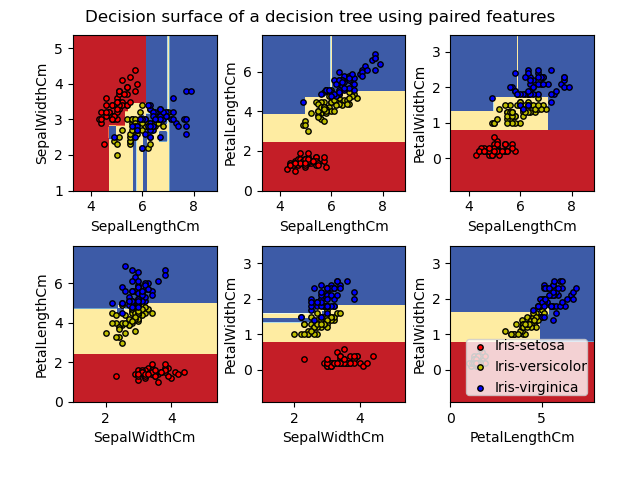

(0.0, 7.88, -0.9, 3.4800000000000044)

In [28]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

fig, ax = plt.subplots() # open figure
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    #X_temp = iris.data[:, pair]
    #y_temp = iris.target

    X_temp = X[:, pair]
    
    # Train
    clf = DecisionTreeClassifier().fit(X_temp, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x1_min, x1_max = X_temp[:, 0].min() - 1, X_temp[:, 0].max() + 1
    x2_min, x2_max = X_temp[:, 1].min() - 1, X_temp[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, plot_step),
                         np.arange(x2_min, x2_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Y = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Y = Y.reshape(xx1.shape)
    cs = plt.contourf(xx1, xx2, Y, cmap=cm.RdYlBu)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X_temp[idx, 0], X_temp[idx, 1], c=color,
                    label=target_names[i],cmap=plt.cm.RdYlBu,
                    edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")